# Purple Cats

## Objective

This videogame aims to learn how a quantum circuit works and to do additions and subtractions from Draper's method, as we believe that with an application can help people learn about quantum computation.

## Context
In a laboratory dedicated to problems of quantum mechanics they have 5 cats as pets, some are green and others are purple. One of the research experiments were in several boxes called QFT, QFT$^{-1}$ and P with certain dephase, one day when they left the cats they forgot to keep the boxes in a place where the cats could not see them, consequently the cats got into the boxes and when the researchers arrived they realized that the cats were green. In this game we must consider the proper way to arrange the boxes in such a way that we find the purple cats in a specific porden since they only know the number of the cat by the collar they wear. 


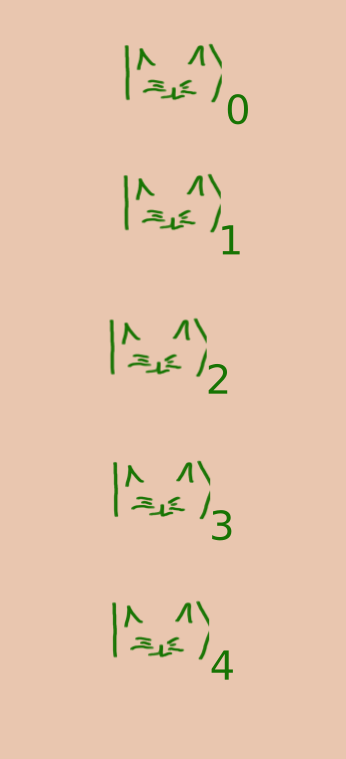


# Rules


At the time the cats were found, only two boxes QFT and QFT$^{-1}$ were not moved, the first one at the beginning and the second one at the end, as shown in the following figure.

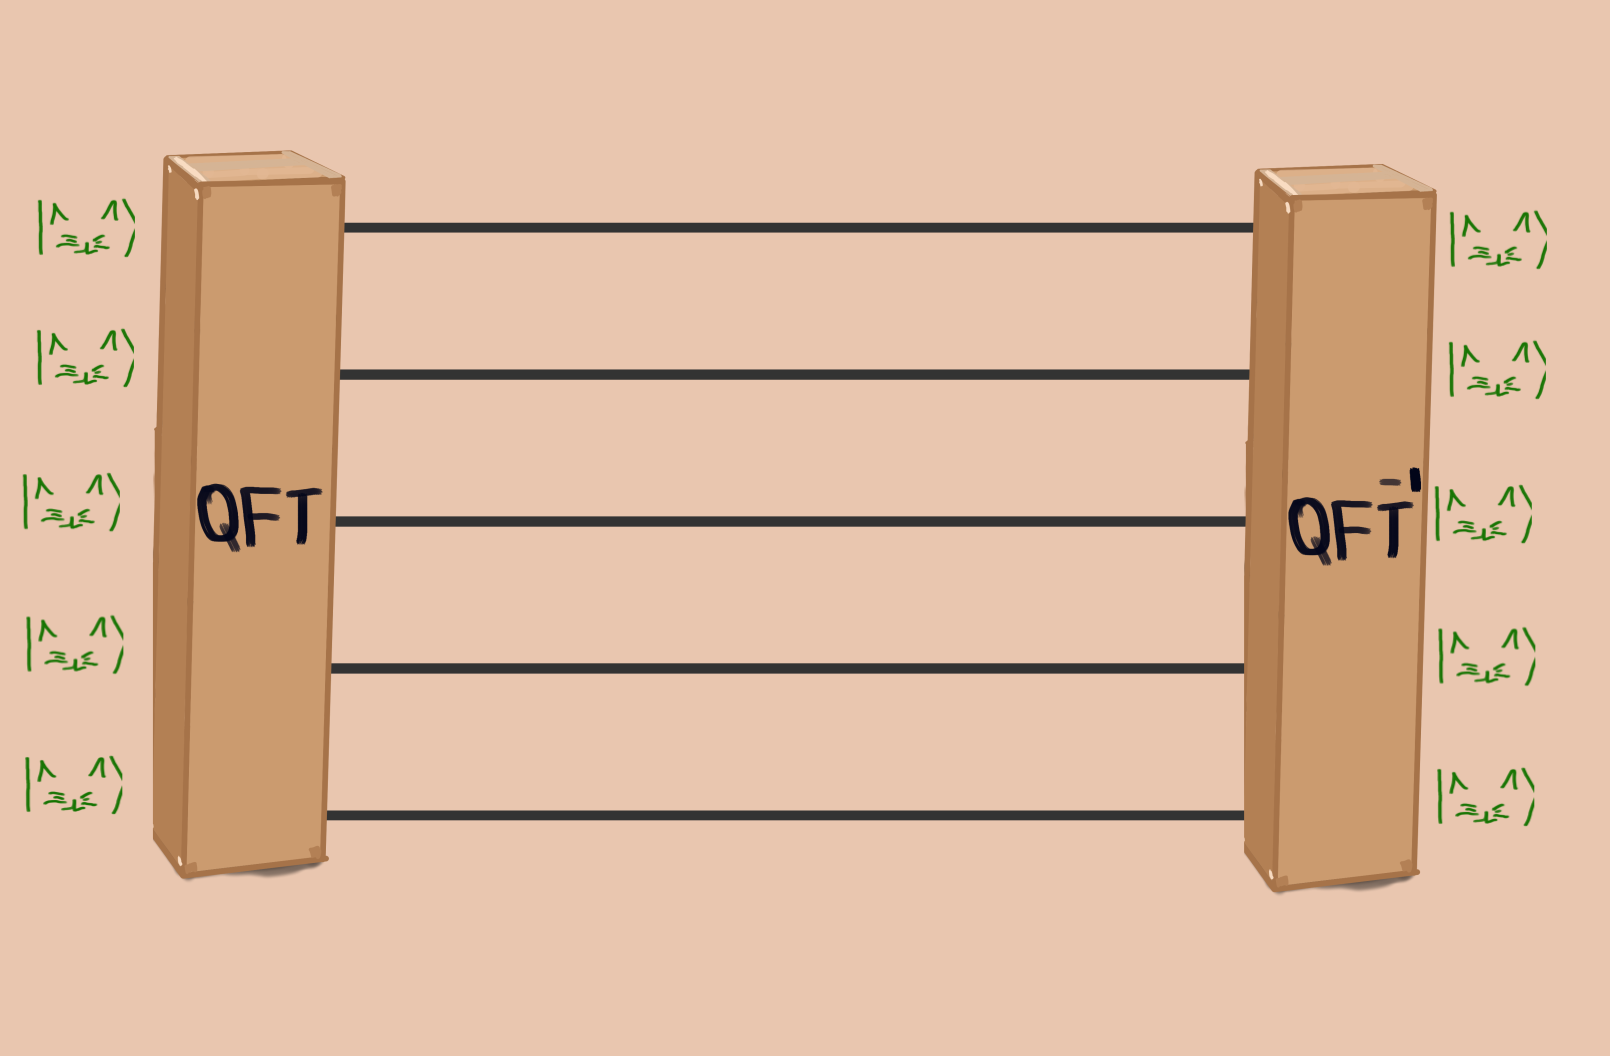


You have the following boxes in an unordered manner:

- 5 box with $P({\pi})$
- 4 box with $P(\frac{\pi}{2})$
- 3 box with $P(\frac{\pi}{4})$
- 2 box with $P(\frac{\pi}{8})$
- 1 box with $P(\frac{\pi}{16})$



Find the way to find the purple cats by following the structure , where the boxes must be arranged in a row order for the cats, it is also possible that not all boxes can be used.


You can select or not to put one or more boxes



## Hints

The researchers found the following 4 answers, with this information helping to find purple cats.



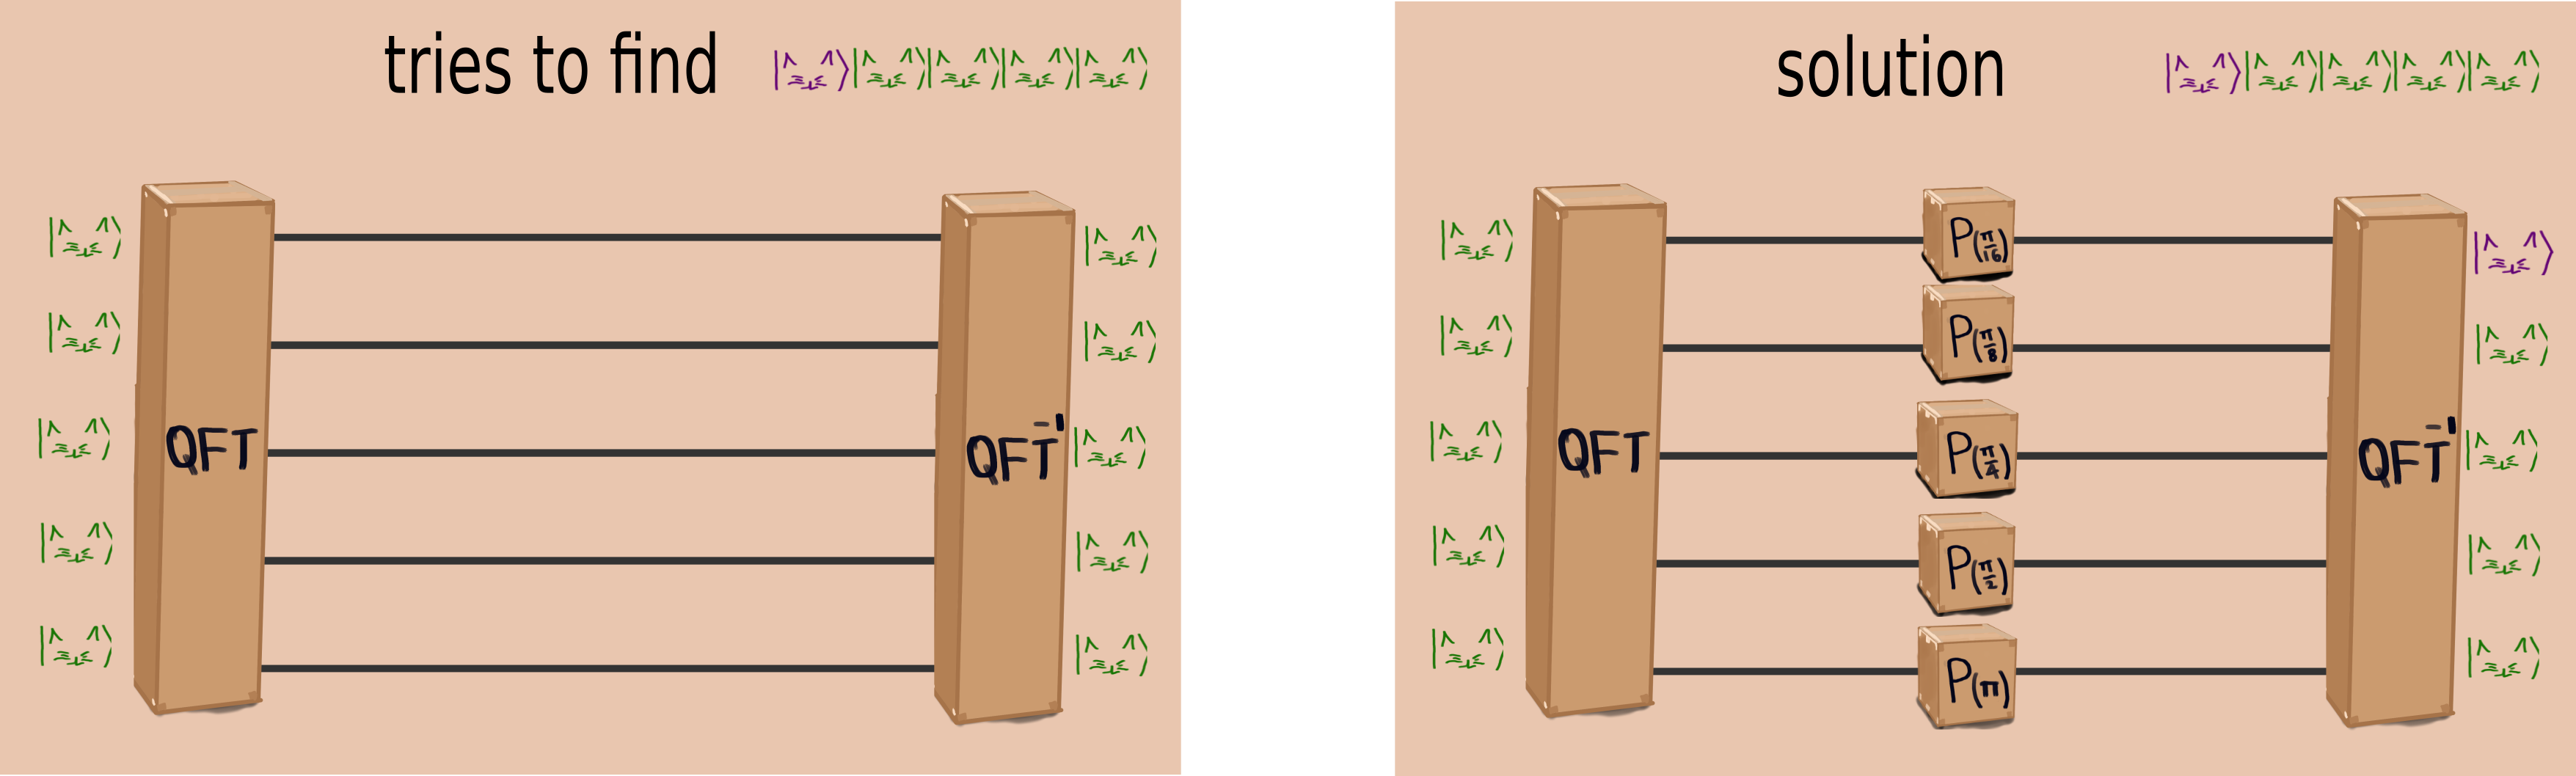

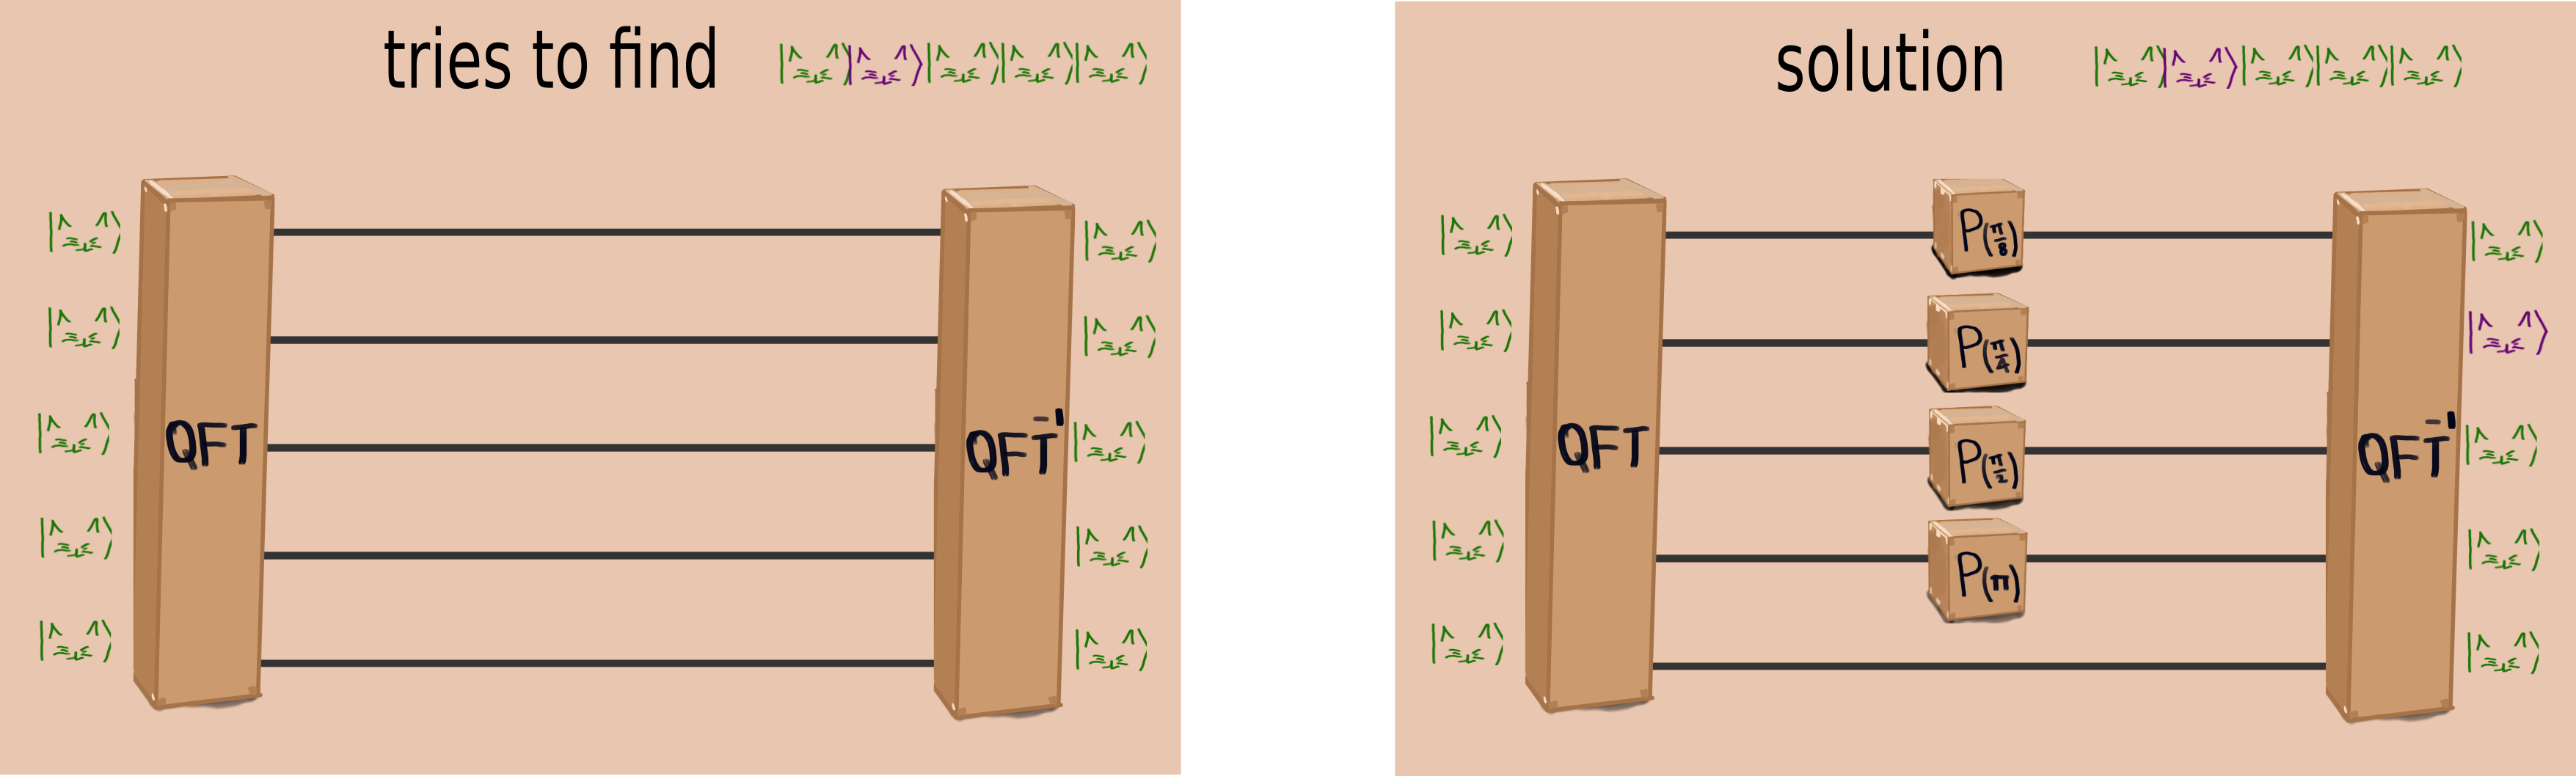

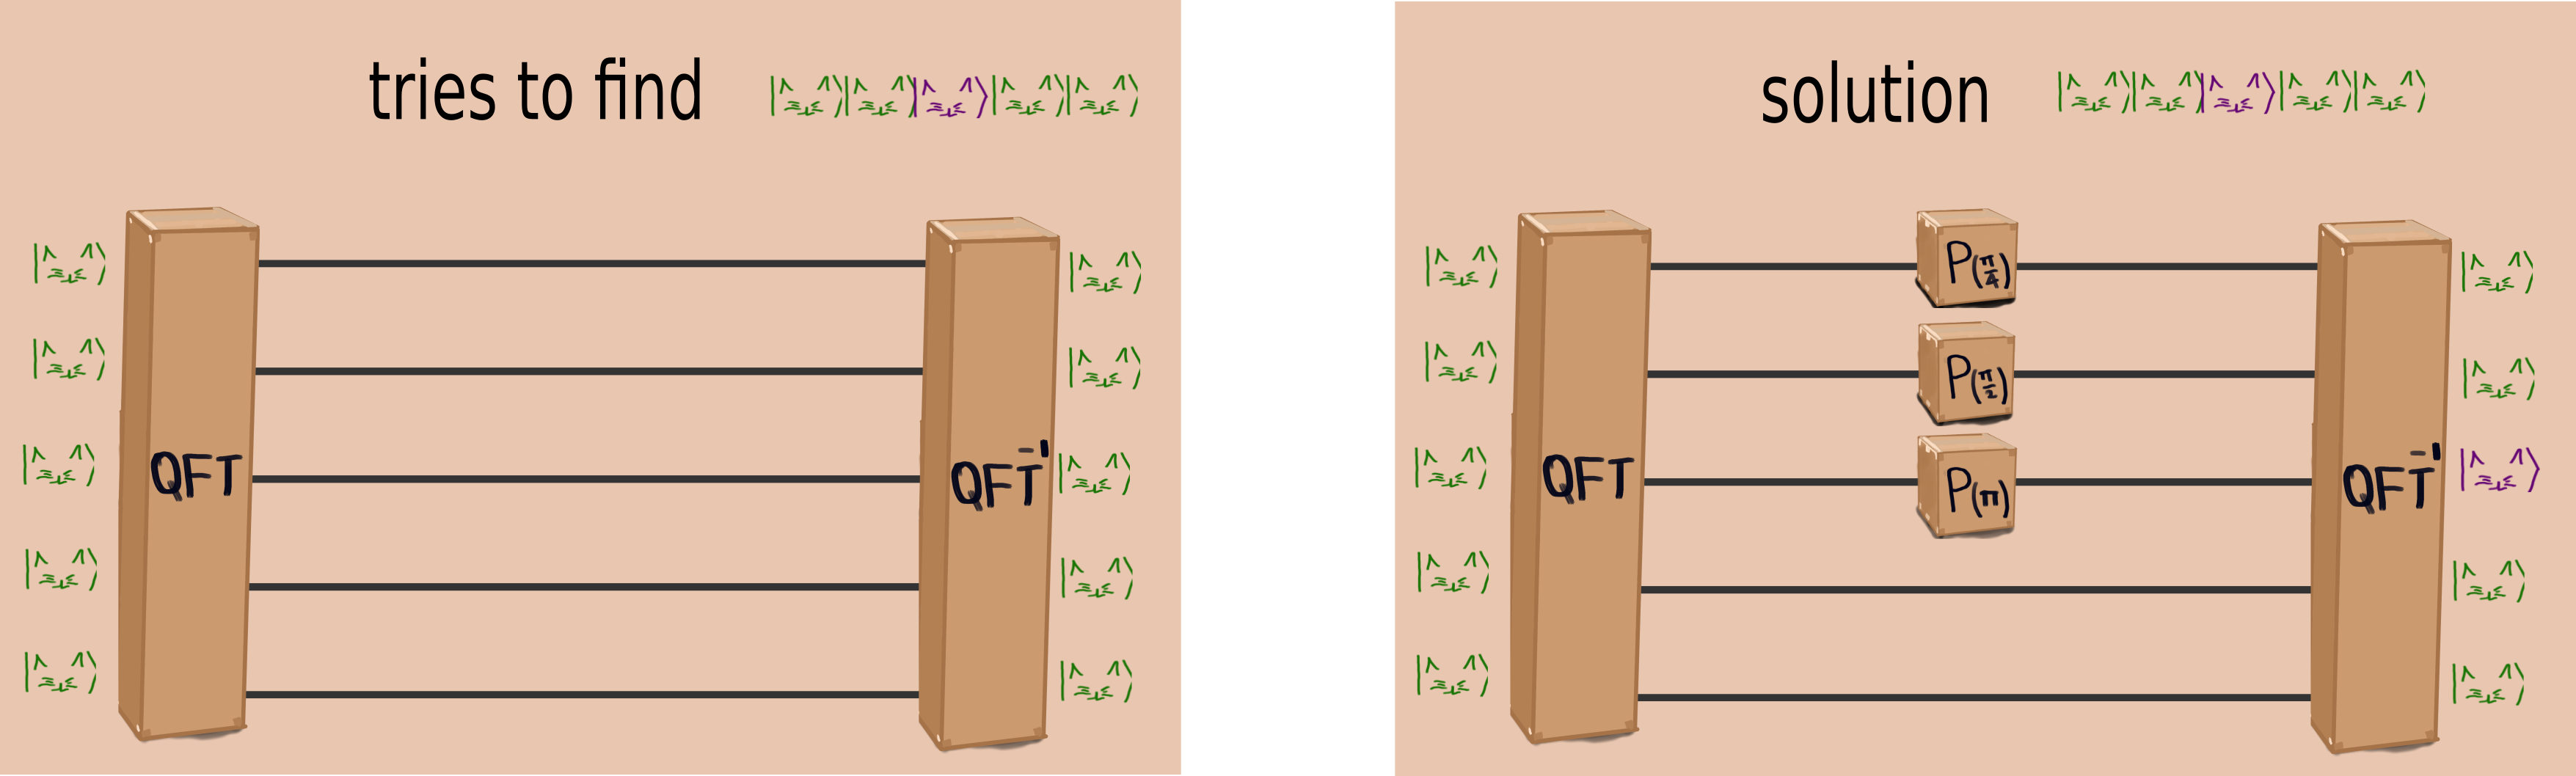

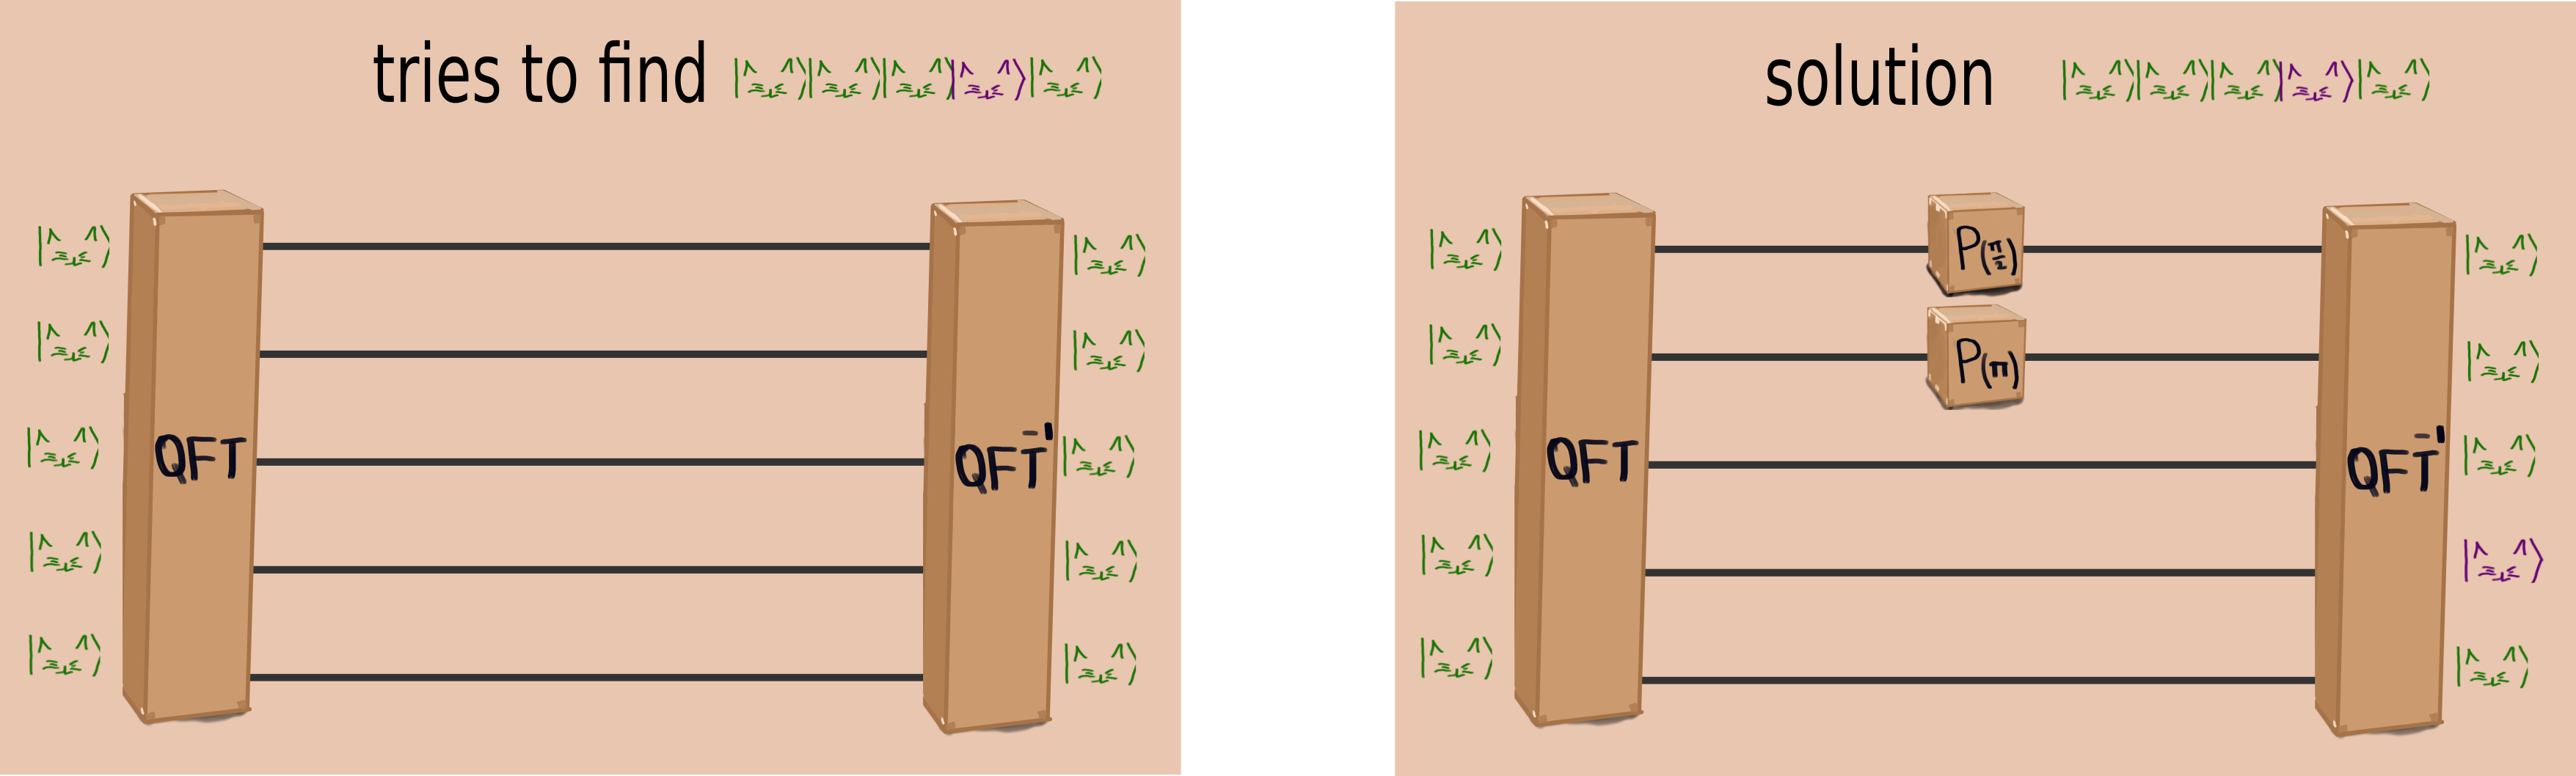

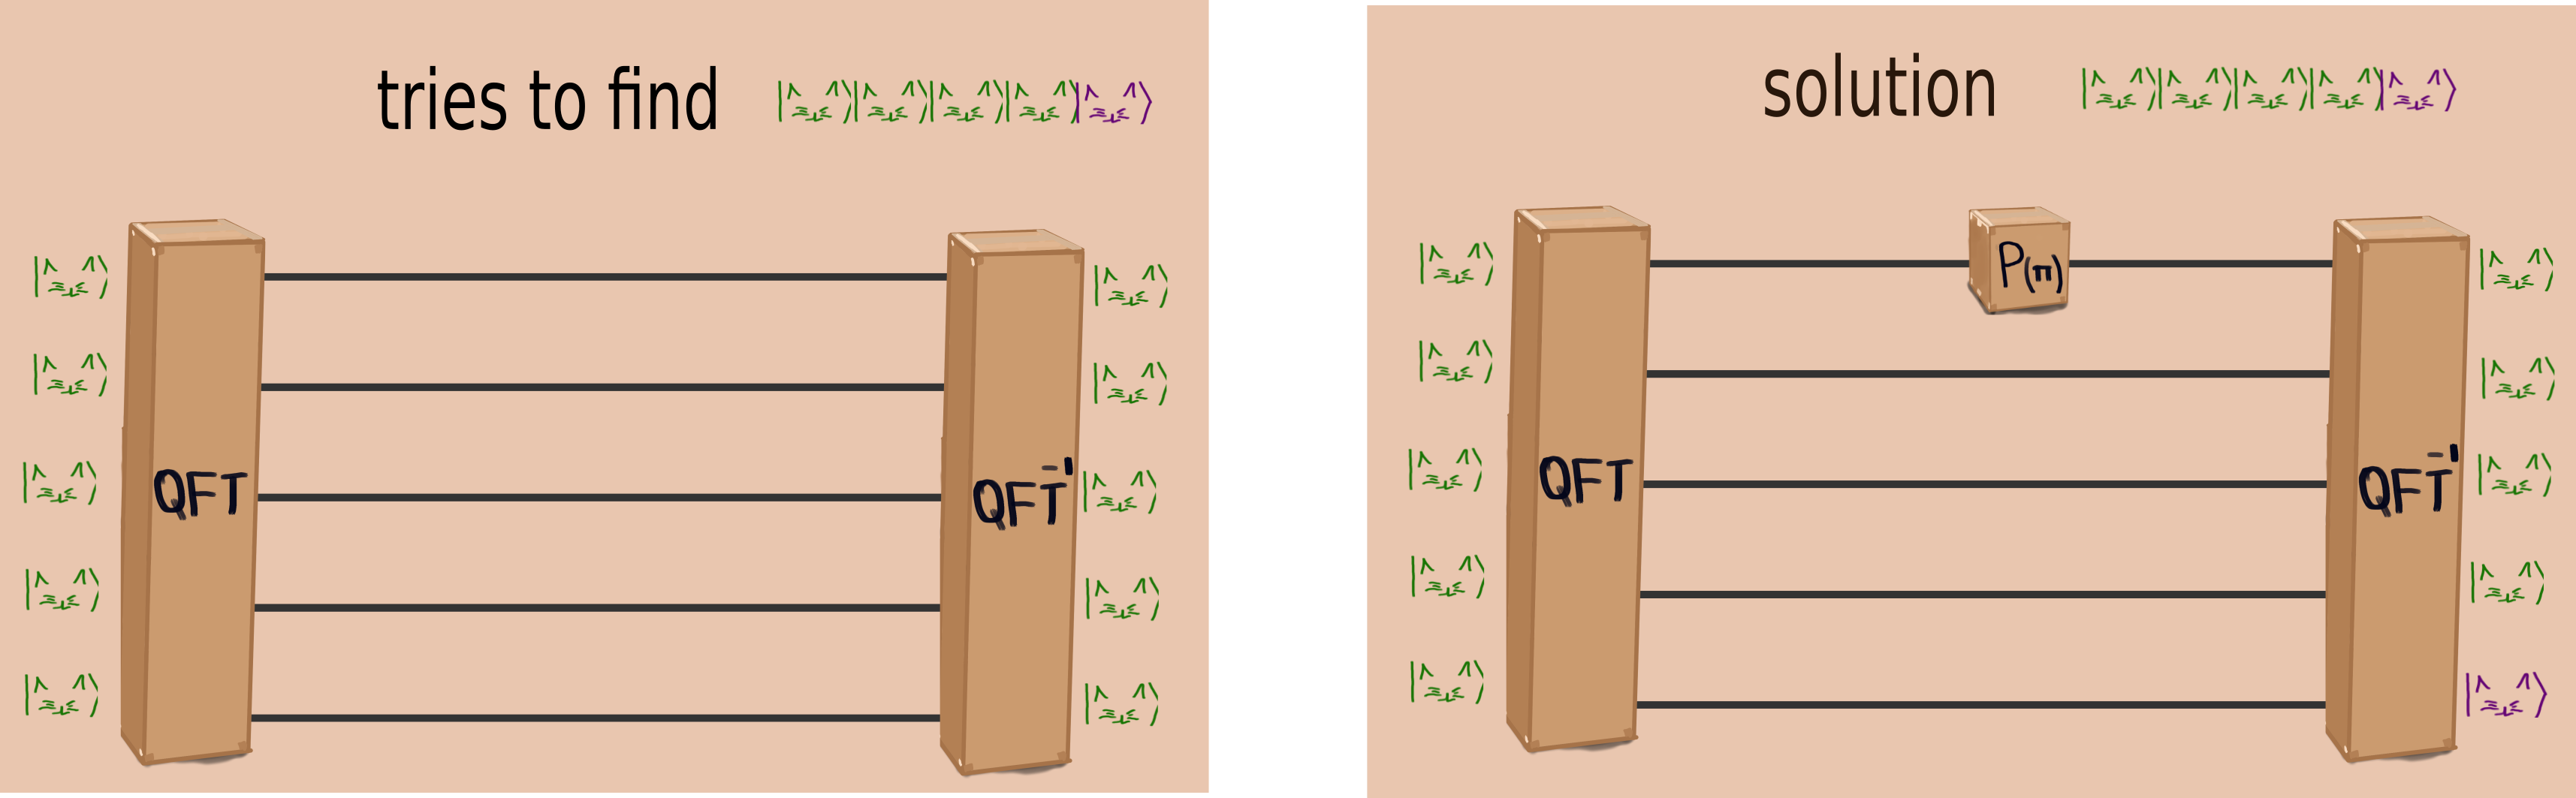

### Code to choose the random value


Using the noise model methods of qiskit we can added some noise like i na real hardware and general a quantum circuit using Hadamards and Cnots gates to generate a random circuit. With the nosie model we cam  consider the noise in the gates X

In [291]:
import numpy as np

# Qiskit libraries 
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute, QuantumRegister, ClassicalRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.circuit.library import QFT
#Nosie model
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError, ReadoutError
from qiskit.providers.aer.noise import pauli_error

In [465]:
def noise_model(): # generate the noise model
    p_gate1 = 0.1

    # QuantumError objects
    error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
    error_gate2 = error_gate1.tensor(error_gate1)

    # Add errors to noise model
    noise_bit_flip = NoiseModel()
    noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u"])
    noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])

    return noise_bit_flip

# generate the circuti that do a QRNG
def random_number(): 
    
    # we  works with a generator of range (1,31)
    # is improtant works with 5 qubits
    circ = QuantumCircuit(5) 
    simulator = Aer.get_backend('qasm_simulator')

    #QRNS Circuit and we do 9 times
    for i in range(9):
        # if we put H in q0 some case we can obtain 0 in the output
        #for this reason we  put X
        circ.x(0) 
        circ.h(1)
        circ.h(2)
        circ.h(3)
        circ.h(4)
        circ.cx(0,1)
        circ.cx(0,2)
        circ.cx(0,3)
        circ.cx(0,4)
        circ.cx(1,2)
        circ.cx(1,3)
        circ.barrier()

    circ.measure_all() # measure all the qubirs

    # Consider the nosie model
    noise_m = noise_model()
    
    #get output
    job = execute(circ, simulator,
              basis_gates=noise_m.basis_gates,#qiskit identify the basis gates
                                            # where the qc works
              noise_model=noise_m, shots= 1) # we put the noise in the noise model
    counts = job.result().get_counts(0)


    num=list(counts.keys())[0]   

    return num

### proof the random number

We can call the method random_number() and return a bitstring with the expect output, where 
- 0 is equal a green cat
- 1 is equal a purple cat

In [470]:
purple_cats_numer = random_number()
purple_cats_numer

'01010'

## Design the algorithm for the videogames

We following the idea of the Draper addition, is neccesary use the QFT and  the inverse QFT, and for generate the data we can use the gates P, this is

$$\begin{split}P(\lambda) =
    \begin{pmatrix}
        1 & 0 \\
        0 & e^{i\lambda}
    \end{pmatrix}\end{split}$$
    
    
Whit this in a certain order of  $\lambda$ is important consider the next expression 

$$e^{i 2 \pi / 2^{n}}$$


- if $n = 1$ we can obtain  $e^{i  \pi }$

- if $n = 2$ we can obtain  $e^{i  \frac{\pi} {2}}$

- if $n = 3$ we can obtain  $e^{i  \frac{\pi} {4}}$

- if $n = 4$ we can obtain  $e^{i  \frac{\pi} {8}}$

- if $n = 5$ we can obtain  $e^{i  \frac{\pi} {16}}$

and we only have 5 cats, so is the same values for the boxes

In [505]:
#convert  integer value to bin value for the quantum circuit
def add_value(qc,data_qubits,const): 
    #a = bin(const)[2:]
    #while len(a) < data_qubits:
    #    a = '0'+a
    a=const[::-1]
    list_a = [0]*data_qubits
    for i in range(data_qubits): 
        if a[i] =='1':
            k = 0
            for j in range(i,data_qubits):
                list_a[data_qubits-j-1] +=np.pi/float(2**(k)) 
                k+=1

    for i in range(data_qubits):
        if list_a[i] != 0:
            qc.p(list_a[i],i)
            k+=1


In [506]:
def find_purple_cats(pi,pi_2,pi_4,pi_8,pi_16,flag=False):
    num_cats = 5
    quantum_cats = QuantumRegister(num_cats, "data")
    purple_cats = ClassicalRegister(num_cats,"oracle")
    qc = QuantumCircuit(quantum_cats,purple_cats)

    len_pi = len(pi)
    len_pi_2 = len(pi_2)
    len_pi_4 = len(pi_4)
    len_pi_8 = len(pi_8)
    len_pi_16 = len(pi_16)

    qc.h(range(num_cats))
    
    if flag: 
        add_value(qc,5, random_number())
    for i in range(len_pi-1,-1,-1):
        if pi[i]!= 0 :
            qc.p(pi[i]*np.pi,i)
            
    for i in range(len_pi_2-1,-1,-1):
        if pi_2[i]!= 0 :
            qc.p(pi_2[i]*np.pi/2,i)
            
    for i in range(len_pi_4-1,-1,-1):
        if pi_4[i]!= 0 :
            qc.p(pi_4[i]*np.pi/4,i)

            
    for i in range(len_pi_8-1,-1,-1):
        if pi_8[i]!= 0 :
            qc.p(pi_8[i]*np.pi/8,i)
            
            
    for i in range(len_pi_16-1,-1,-1):
        if pi_16[i]!= 0 :
            qc.p(pi_16[i]*np.pi/16,i)   
    
    qc = qc.compose(QFT(num_qubits=num_cats,inverse=True),quantum_cats)
    qc.measure(quantum_cats,purple_cats)
    return qc

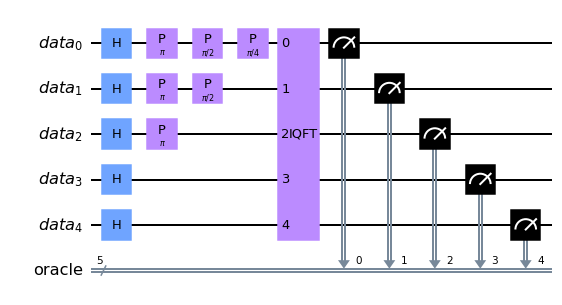

In [507]:
# init variables
pi = [0]*5
pi_2 = [0]*4
pi_4 = [0]*3
pi_8 = [0]*2
pi_16 = [0]


# select the values 
pi[0] = 1

pi[1] = 1
pi_2[0] = 1

pi[2] = 1
pi_2[1] = 1
pi_4[0] = 1

qc = find_purple_cats(pi,pi_2,pi_4,pi_8,pi_16)
qc.draw("mpl")

In [508]:
qc = find_purple_cats(pi,pi_2,pi_4,pi_8,pi_16)
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
sol=list(counts.keys())[0]

print("your answer is ",sol)
if purple_cats_numer == sol:
    print("You Got it")
else:
    print("Try again")

your answer is  11100
Try again


## Another modality

There are two more considerations that if the purple cats are not the same as the ones we expect, then we must reconvert this, for this, we also have that the P-boxes can be positive or negative.

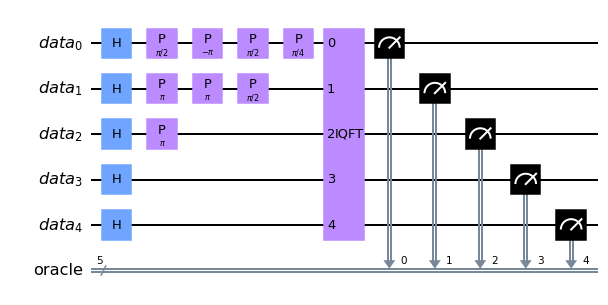

In [509]:
# init variables
pi = [0]*5
pi_2 = [0]*4
pi_4 = [0]*3
pi_8 = [0]*2
pi_16 = [0]


# select the values 
pi[0] = -1

pi[1] = 1
pi_2[0] = 1

pi[2] = 1
pi_2[1] = 1
pi_4[0] = 1

qc = find_purple_cats(pi,pi_2,pi_4,pi_8,pi_16,True)
qc.draw("mpl")

In [510]:
qc = find_purple_cats(pi,pi_2,pi_4,pi_8,pi_16)
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
sol=list(counts.keys())[0]

print("your answer is ",sol)
if purple_cats_numer == sol:
    print("You Got it")
else:
    print("Try again")

your answer is  11100
Try again
